In [122]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [123]:
#importing data
house_data = pd.read_csv("house_data.csv")

In [124]:
#viewing data
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [125]:
#checking missing values
house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [126]:
#dropping irrelevant column
house_data=house_data.drop('id',axis = 1)

In [127]:
#checking data types
house_data.dtypes

date              object
price              int64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [128]:
#converting date column to datetime and extracting year out of it
house_data['date'] = pd.to_datetime(house_data['date']).dt.year

In [129]:
#calculating no. of years since the house was built 
house_data['yr_built'] = house_data['date']-house_data['yr_built']

In [130]:
#converting yr_renovated column with categories "0" for "not renovated" and "1" for "renovated"
for i in range(house_data.shape[0]):
    if house_data['yr_renovated'][i] != 0:
        house_data['yr_renovated'][i] = 1

In [131]:
#dropping date column
house_data = house_data.drop('date',axis = 1)

In [132]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,59,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,63,1,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,82,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,49,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,28,0,98074,47.6168,-122.045,1800,7503


In [133]:
house_data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,43.317818,0.042289,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.375493,0.201253,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,-1.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,18.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,40.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,63.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,115.000000,1.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [134]:
#function for creating box plots to check outliers in the data
def draw_boxplot(feature):
    plt.figure(figsize=(20,5))
    plot = sns.boxplot(house_data[feature],house_data['price'],orient = "v")
    return plot

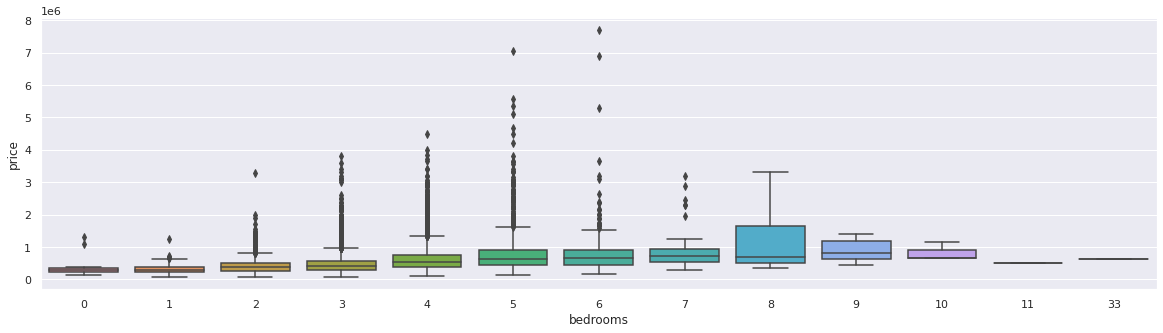

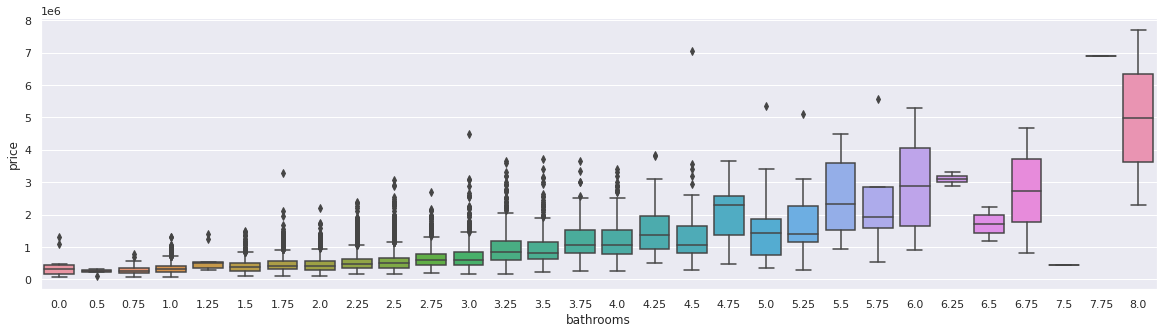

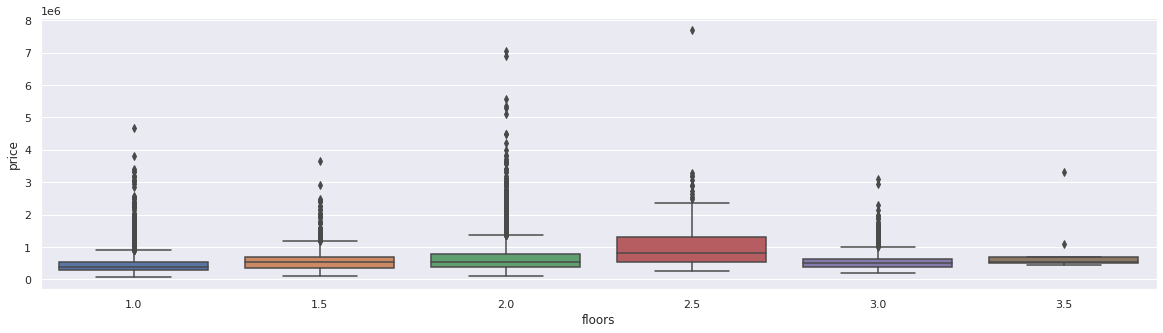

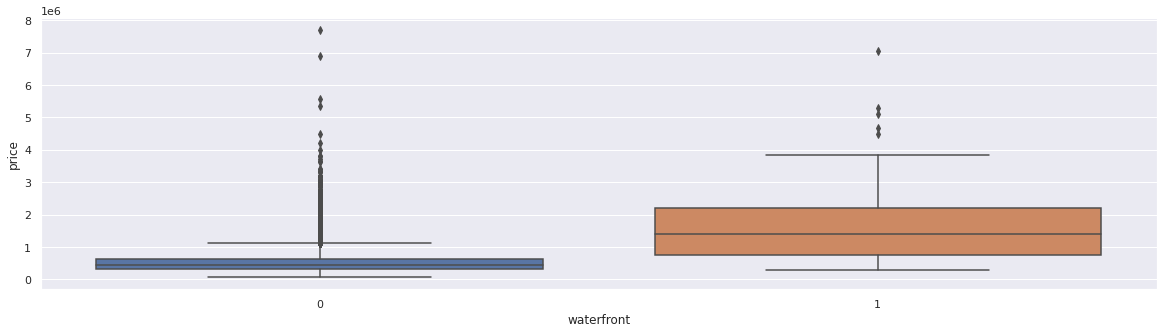

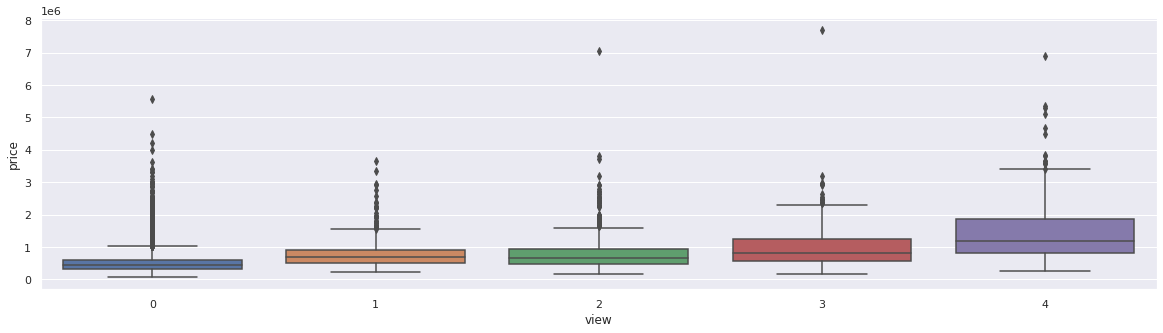

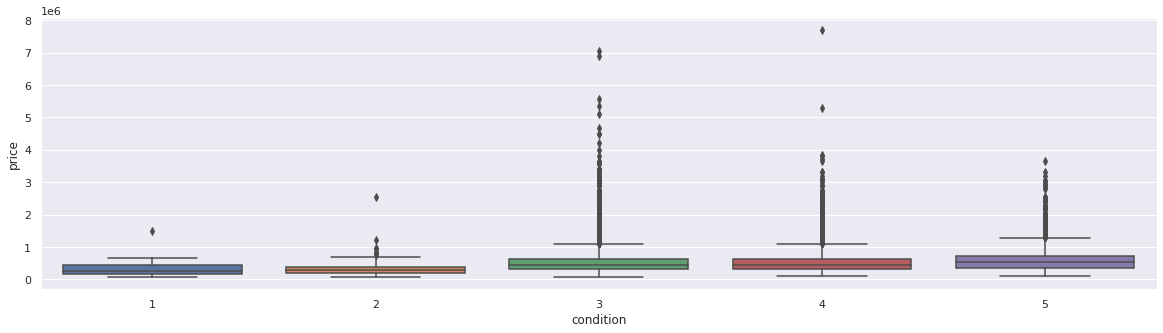

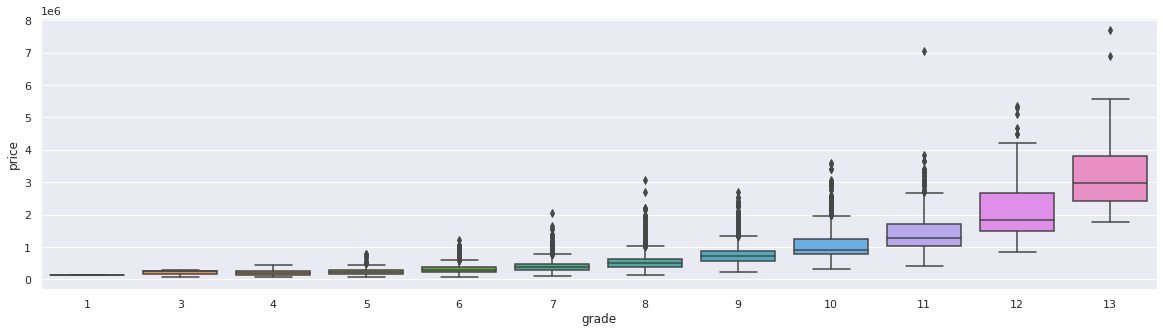

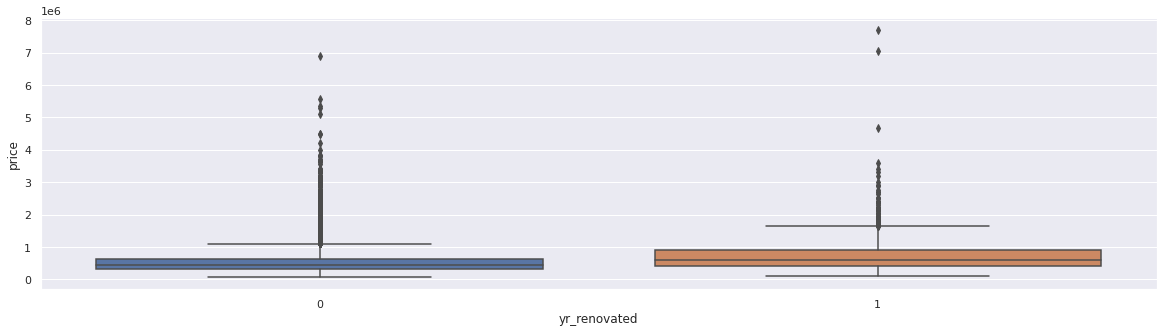

In [135]:
#plotting box plots
features = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_renovated']
for feature in features:
    draw_boxplot(feature)

There are many outliers in every feature but these are legitimate outliers affecting the price and hence removing them is not a good idea. But in 'bedrooms' column, there is value showing 33 bedrooms, which i think is entered by mistake, so removing that particular record.

In [136]:
#removing the record with 33 bedrooms
house_data.drop(house_data.index[house_data['bedrooms'] == 33],inplace = True)
house_data = house_data.reset_index(drop = True)

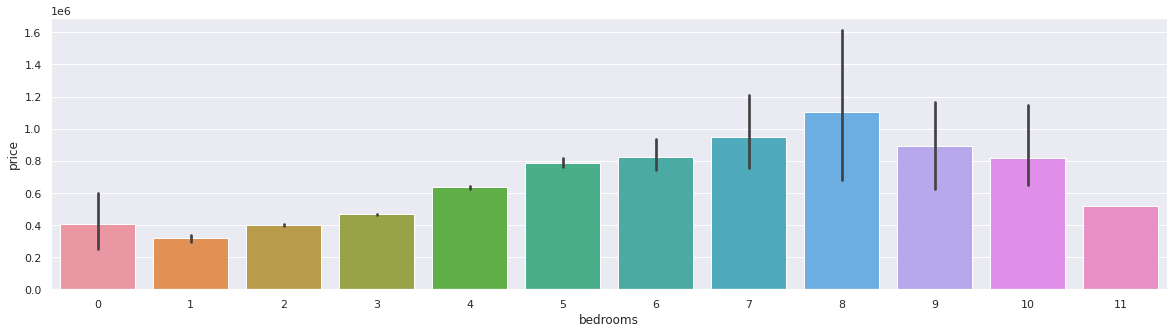

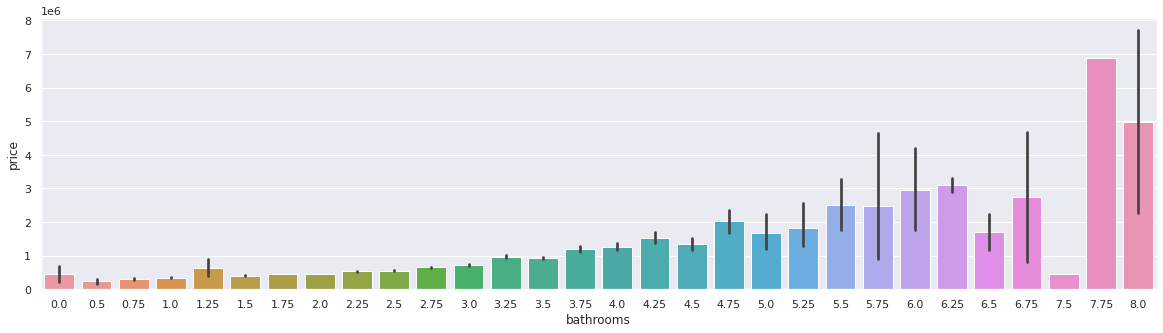

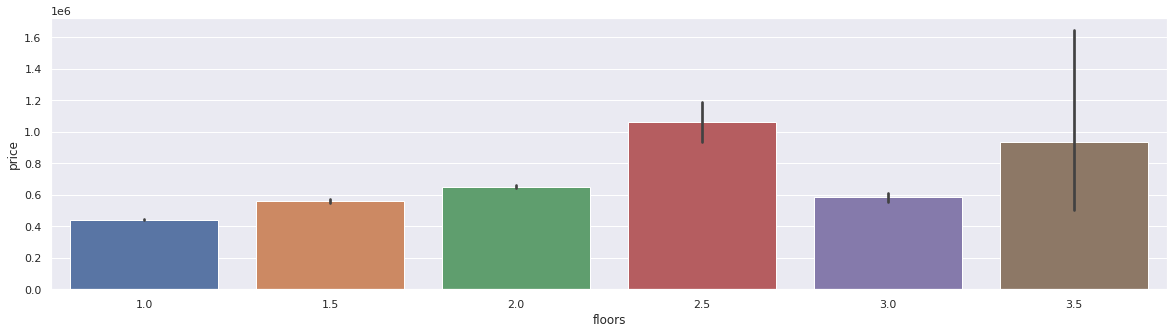

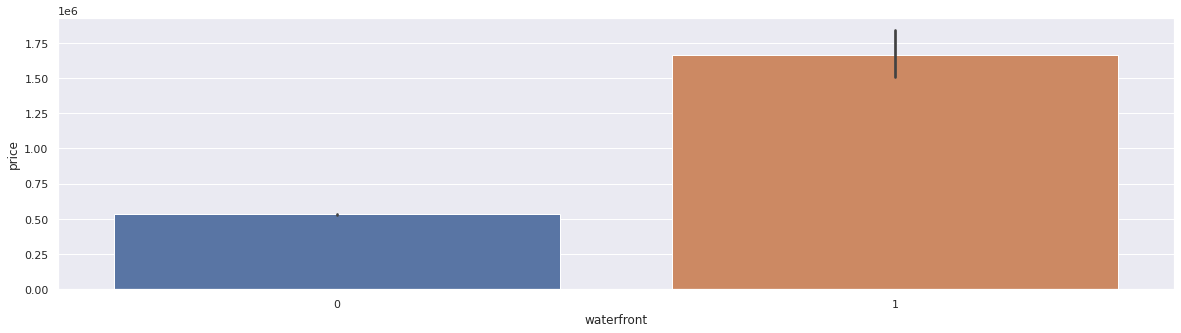

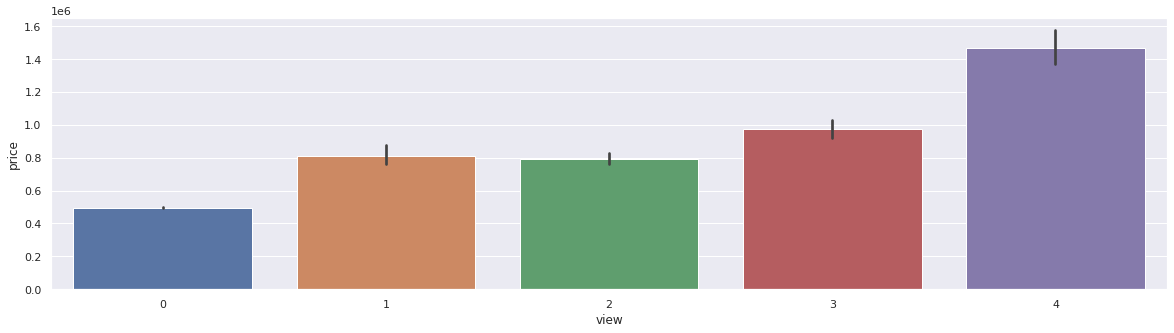

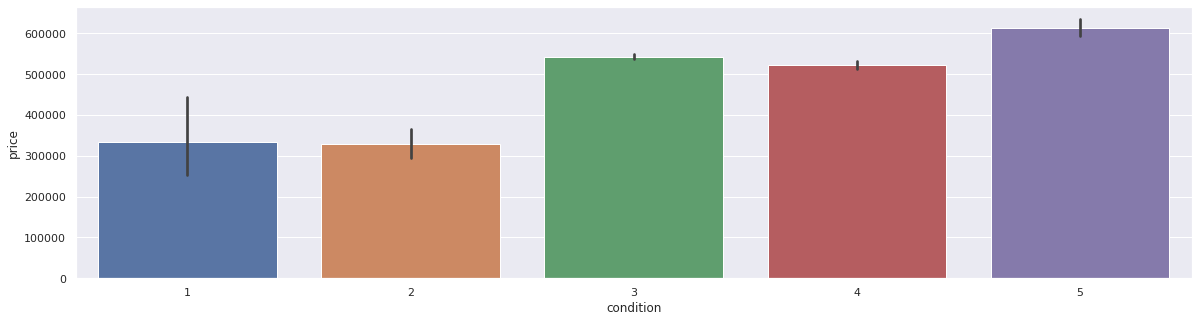

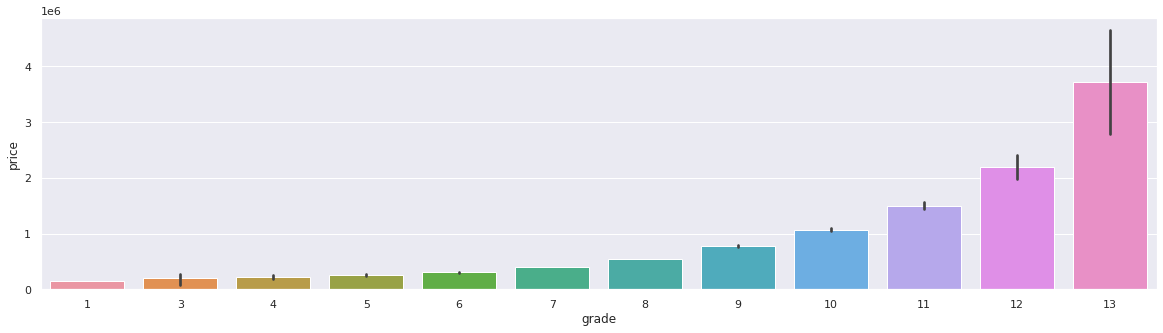

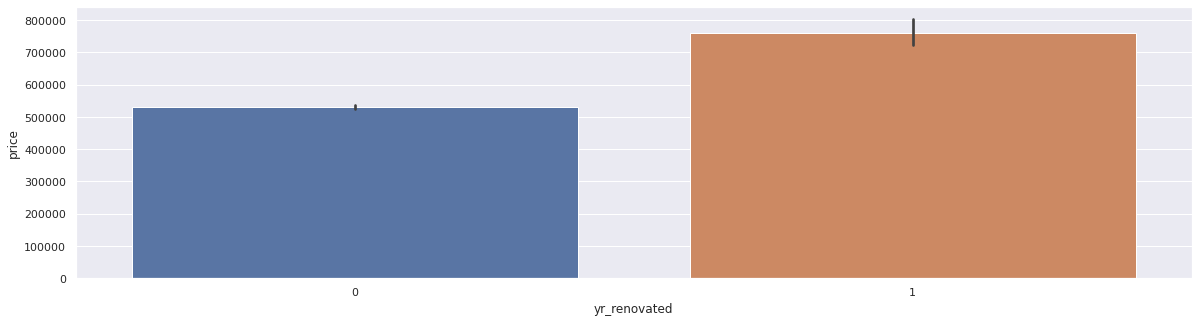

In [137]:
#effect of categorical features on price
categorical_features = ['bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_renovated']
for i in categorical_features:
    plt.figure(figsize = (20,5))
    sns.barplot(house_data[i],house_data['price'])
    

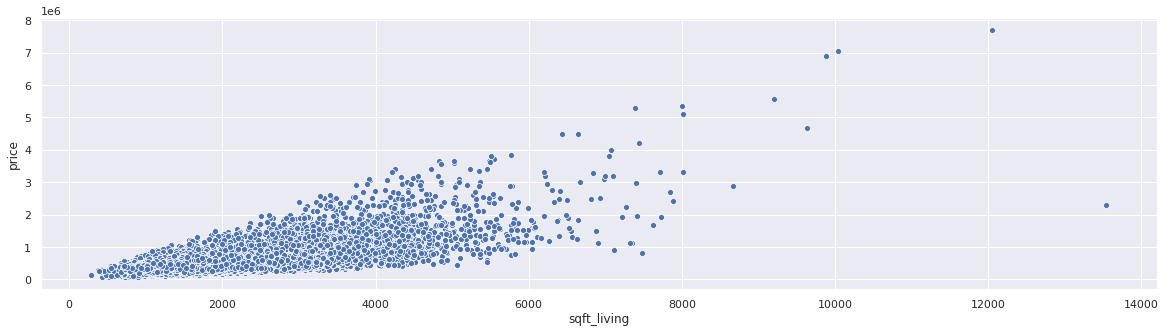

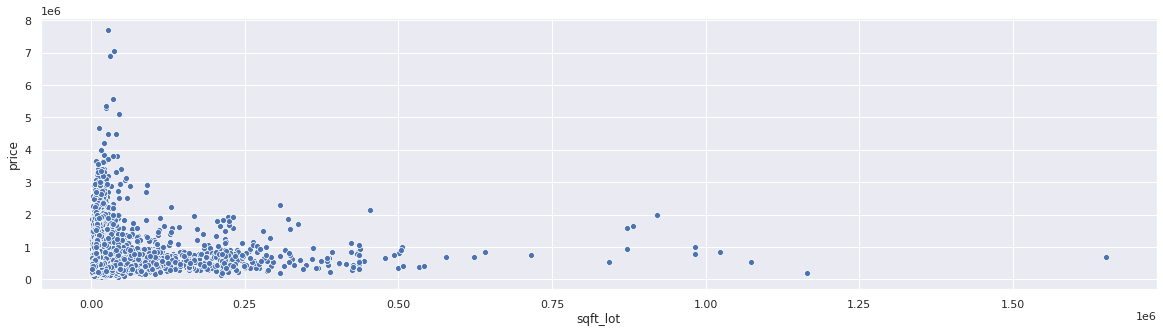

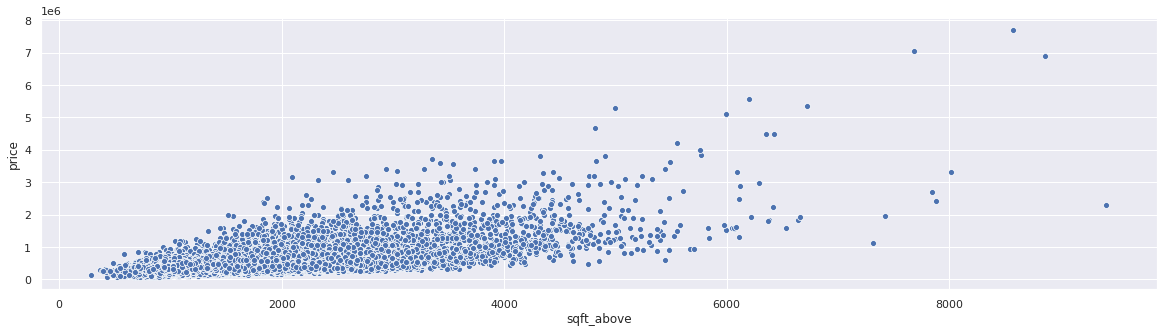

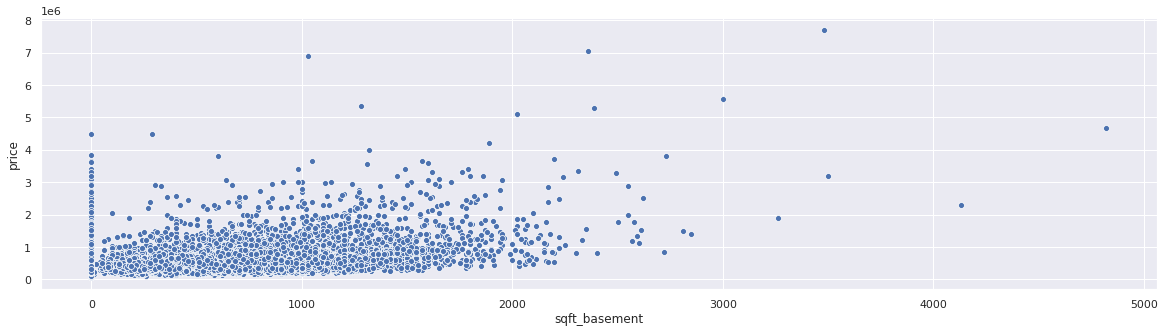

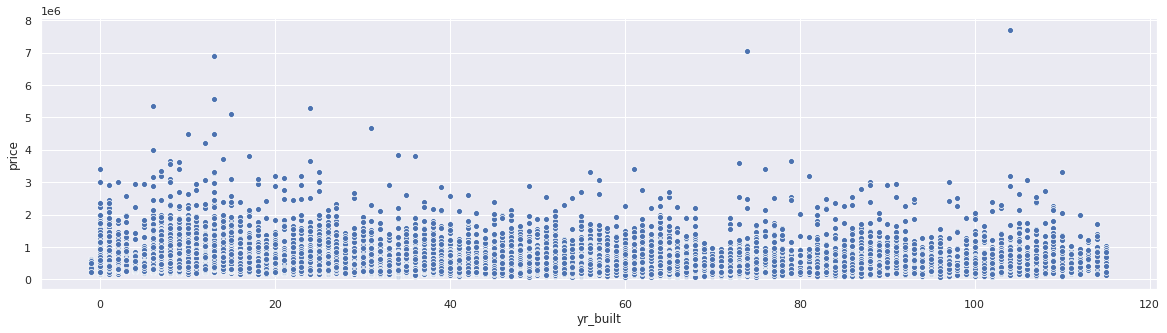

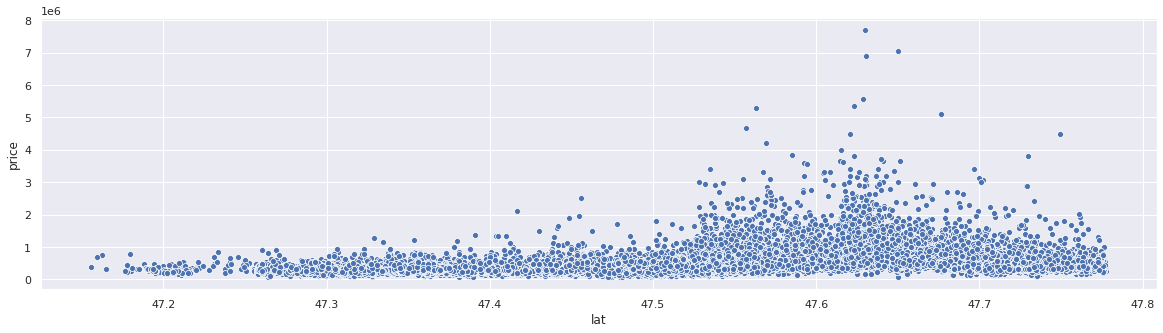

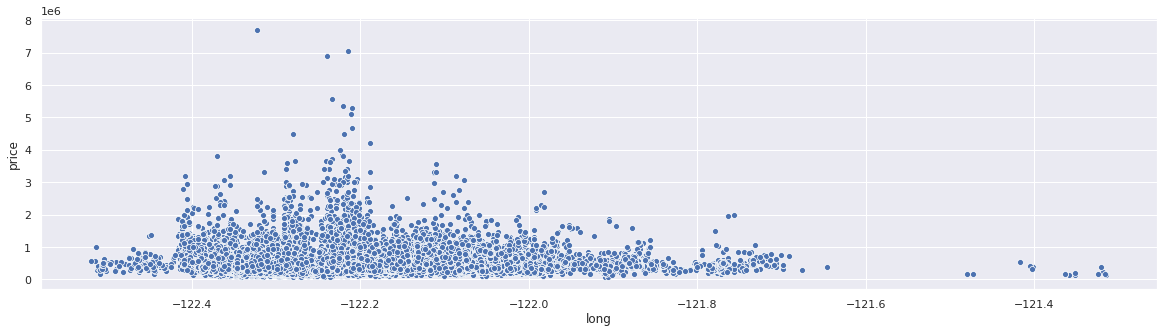

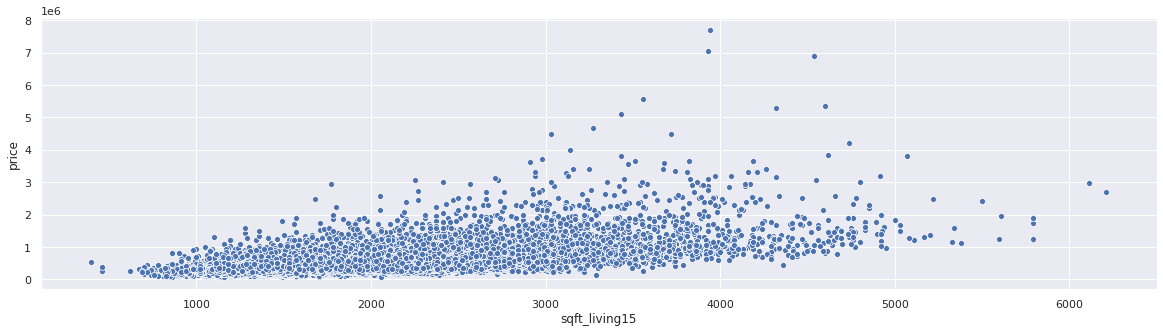

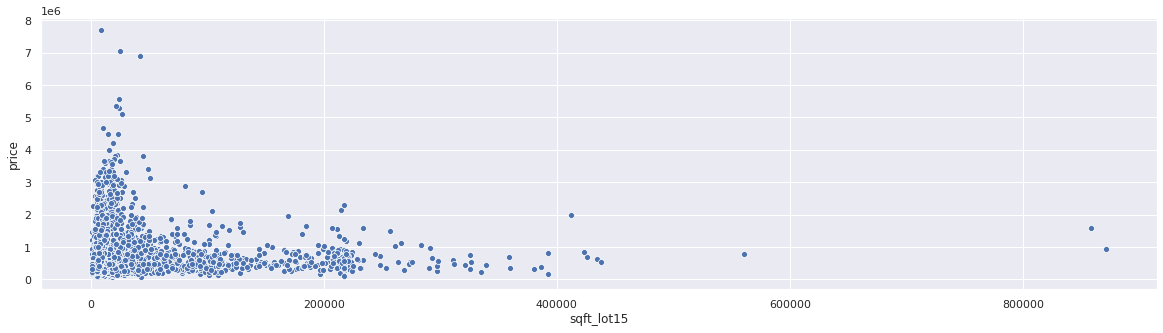

In [138]:
#effect of continuous features on price
continuous_features = ['sqft_living','sqft_lot','sqft_above','sqft_basement','yr_built','lat','long','sqft_living15','sqft_lot15']
for i in continuous_features:
    plt.figure(figsize = (20,5))
    sns.scatterplot(house_data[i],house_data['price'])

In [139]:
# Create correlation matrix
corr_matrix = house_data.corr().abs()

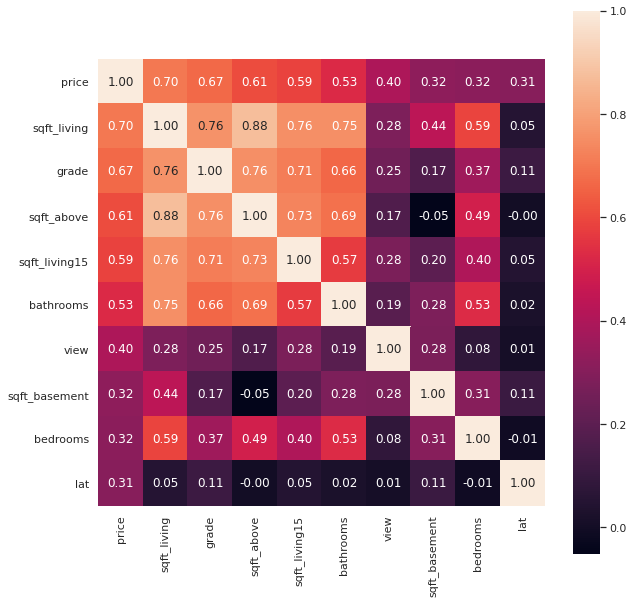

In [140]:
#Plotting correlation through heatmap consisting of 10 columns with high correlation 
plt.figure(figsize=(10,10))
columns = corr_matrix.nlargest(10, 'price').index
correlation_map = np.corrcoef(house_data[columns].values.T)
sns.set(font_scale=1.0)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)

plt.show()

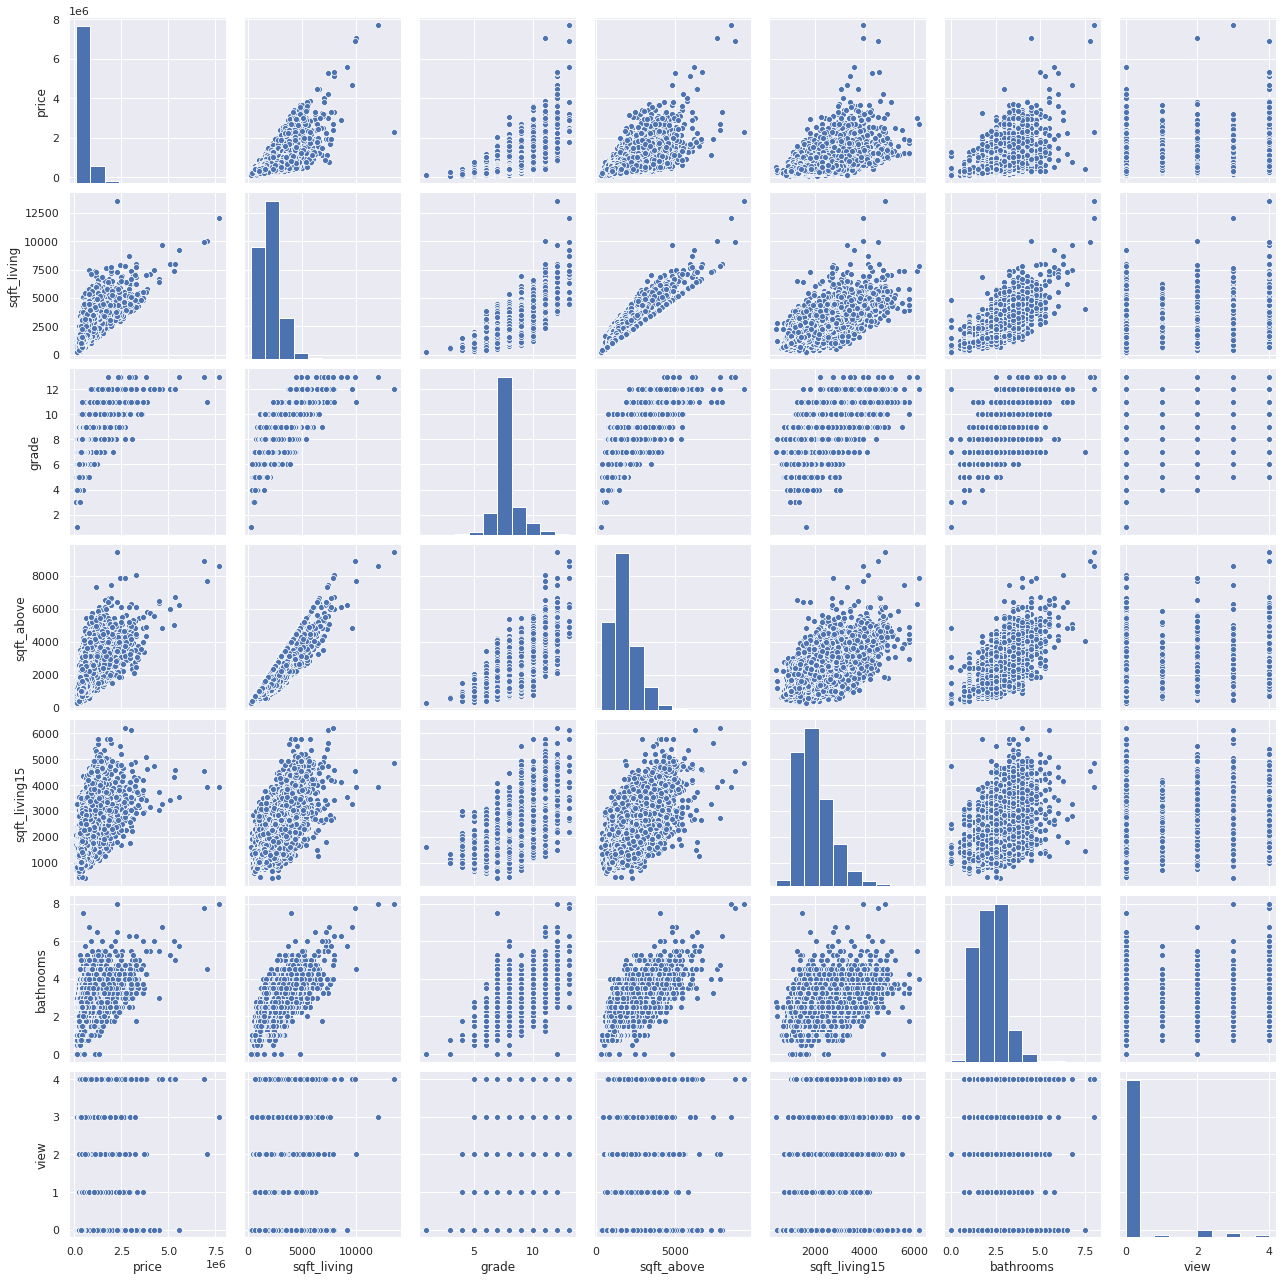

In [141]:
# plotting paiplots of 7 most important features
imp_features = corr_matrix.nlargest(7, 'price').index
sns.pairplot(house_data[imp_features],height = 2.5)

In [142]:
# correlation of all the features with target feature "price"
corr_matrix['price'].sort_values(ascending = False)

price            1.000000
sqft_living      0.702047
grade            0.667447
sqft_above       0.605591
sqft_living15    0.585404
bathrooms        0.525147
view             0.397299
sqft_basement    0.323812
bedrooms         0.315445
lat              0.306998
waterfront       0.266371
floors           0.256811
yr_renovated     0.126095
sqft_lot         0.089664
sqft_lot15       0.082451
yr_built         0.053962
zipcode          0.053209
condition        0.036336
long             0.021637
Name: price, dtype: float64

In [143]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.80
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

# Drop features 
house_data.drop(to_drop, axis=1, inplace=True)

In [145]:
#separating independent and dependent features
X = house_data.drop("price",axis = 1)
y = house_data['price']

In [146]:
# splitting test and train data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 30)

In [107]:
X_train.shape,X_test.shape

((15128, 17), (6484, 17))

In [108]:
X_test.shape,y_test.shape

((6484, 17), (6484,))

In [147]:
# standardising features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [154]:
# applying linear regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_std,y_train)
y_pred = regressor.predict(X_test_std)

In [155]:
# calculating r-square score
from sklearn.metrics import r2_score
LR_score = r2_score(y_test,y_pred)
LR_score

0.712410482718848

In [157]:
# function to calculate adjusted r-square
def adj_r2(r2_score):
    adj_r2 = 1-(1-r2_score)*(len(y_test)-1)/(len(y_test)-17-1)
    return adj_r2
# calculating adjusted r-square
LR_adj_r2 = adj_r2(LR_score)
LR_adj_r2

0.7116543704711246

In [158]:
# applying Gradient Boost model
from sklearn.ensemble import GradientBoostingRegressor
regressor = GradientBoostingRegressor()
model = regressor.fit(X_train,y_train)
y_pred = model.predict(X_test)

# calculating r-square score
GB_score = r2_score(y_test,y_pred)
GB_score

0.8676941834685059

In [159]:
# calculating adjusted r-square
GB_adj_r2 = adj_r2(GB_score)
GB_adj_r2

0.8673463333477148

In [160]:
# applying random forest
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
model = regressor.fit(X_train,y_train)
y_pred = model.predict(X_test)

# calculating r-square score
RF_score = r2_score(y_test,y_pred)
RF_score

0.8716847617306147

In [161]:
# calculating adjusted r-square
RF_adj_r2 = adj_r2(RF_score)
RF_adj_r2

0.8713474033868814

we can see out of the three models applied above, "Random Forest" works best with r-square value 87%

In [120]:
# comparing results with test data
test = pd.DataFrame(y_test).reset_index(drop = True)
prediction = pd.DataFrame(y_pred).reset_index(drop = True)
prediction.rename(columns = {0:'price_pred'}, inplace = True) 
comparison = pd.concat([test,prediction],axis = 1)
comparison['difference'] = comparison['price']-comparison['price_pred']
comparison

,price,price_pred,difference
0,353500,352390.11,1109.89
1,384950,366550.40,18399.60
2,340000,412445.51,-72445.51
3,400950,416278.41,-15328.41
4,602000,602703.30,-703.30
...,...,...,...
6479,450000,372101.50,77898.50
6480,334900,406805.30,-71905.30
6481,266500,245515.50,20984.50
6482,450000,488198.49,-38198.49
